**TASK-3 Car Price Prediction**

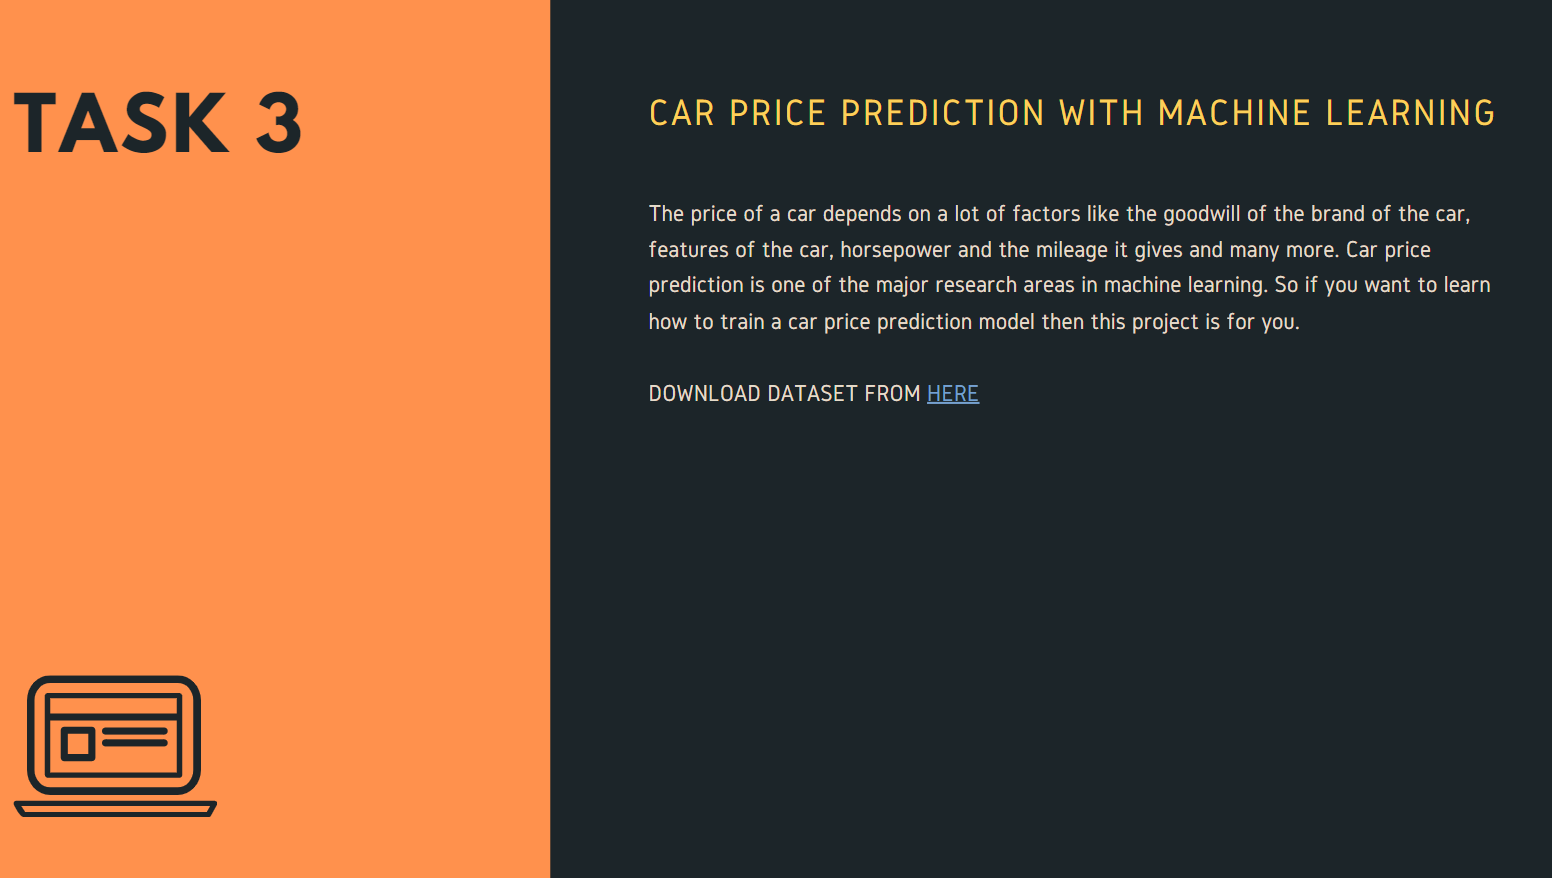

**Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [2]:
df=pd.read_excel('/content/car_price.xlsx')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**Information About Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.corr()*100

<ipython-input-5-dcd83cd45f34>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()*100


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,100.000000,-15.162114,12.972878,17.063639,5.238661,25.596004,7.196156,-3.392984,26.006368,-16.082362,15.027591,-1.500557,-20.378920,1.594004,1.125532,-10.909334
symboling,-15.162114,100.000000,-53.195368,-35.761152,-23.291906,-54.103820,-22.769059,-10.578971,-13.005136,-0.873514,-17.851508,7.087272,27.360625,-3.582263,3.460600,-7.997822
wheelbase,12.972878,-53.195368,100.000000,87.458748,79.514364,58.943476,77.638633,56.932868,48.874988,16.095905,24.978585,35.329448,-36.046875,-47.041361,-54.408192,57.781560
carlength,17.063639,-35.761152,87.458748,100.000000,84.111827,49.102946,87.772846,68.335987,60.645436,12.953261,15.841371,55.262297,-28.724220,-67.090866,-70.466160,68.292002
carwidth,5.238661,-23.291906,79.514364,84.111827,100.000000,27.921032,86.703246,73.543340,55.914991,18.294169,18.112863,64.073208,-22.001230,-64.270434,-67.721792,75.932530
carheight,25.596004,-54.103820,58.943476,49.102946,27.921032,100.000000,29.557173,6.714874,17.107092,-5.530667,26.121423,-10.880206,-32.041072,-4.863963,-10.735763,11.933623
curbweight,7.196156,-22.769059,77.638633,87.772846,86.703246,29.557173,100.000000,85.059407,64.847975,16.879004,15.136174,75.073925,-26.624318,-75.741378,-79.746479,83.530488
enginesize,-3.392984,-10.578971,56.932868,68.335987,73.543340,6.714874,85.059407,100.000000,58.377433,20.312859,2.897136,80.976865,-24.465983,-65.365792,-67.746991,87.414480
boreratio,26.006368,-13.005136,48.874988,60.645436,55.914991,17.107092,64.847975,58.377433,100.000000,-5.590898,0.519734,57.367682,-25.497553,-58.453172,-58.701178,55.317324
stroke,-16.082362,-0.873514,16.095905,12.953261,18.294169,-5.530667,16.879004,20.312859,-5.590898,100.000000,18.611011,8.093954,-6.796375,-4.214475,-4.393093,7.944308


In [6]:
df=df.drop(columns=["car_ID",'CarName','enginetype','cylindernumber','fueltype','aspiration','fuelsystem','doornumber','carbody','drivewheel','enginelocation'])
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
x=df.iloc[:,:-1]
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [8]:
y=df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

**Loading The Model**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.0,111,5000,21,27
68,-1,110.0,190.9,70.3,58.7,3750,183,3.58,3.640,21.5,123,4350,22,25
58,3,95.3,169.0,65.7,49.6,2500,80,3.33,3.255,9.4,135,6000,16,23
18,2,88.4,141.1,60.3,53.2,1488,61,2.91,3.030,9.5,48,5100,47,53
171,2,98.4,176.2,65.6,52.0,2714,146,3.62,3.500,9.3,116,4800,24,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0,96.1,181.5,66.5,55.2,2579,132,3.46,3.900,8.7,90,5100,23,31
135,2,99.1,186.6,66.5,56.1,2758,121,3.54,3.070,9.3,110,5250,21,28
162,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.030,9.0,70,4800,28,34
178,3,102.9,183.5,67.7,52.0,2976,171,3.27,3.350,9.3,161,5200,20,24


In [12]:
model=LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [14]:
ypred=model.predict(x_test)
ypred

array([16463.41229129, 10534.06022075, 21435.12078028, 27329.00231924,
       11997.90451879, 17151.27388875, 19235.10148723,  8670.73215712,
       17766.23898253,  9373.68147706,  7745.10387739, 10444.23449067,
       18067.42581841, 18820.88223643,  5858.75751352, 13672.05318481,
       15999.098201  ,  9423.48914715, 10901.9876634 , 11893.02136983,
       16079.3008484 ,  5740.55327399, 25624.64493567, 24528.69779918,
       11271.11531024,  5207.37825038,  6739.97236579,  6053.25660898,
       16550.13617737, 24810.56526934, 17924.09223174,  6222.27661587,
        6512.87580604, 23068.0542678 ,  5921.98843711,  9705.23361614,
        6666.33854201, 49360.400113  , 27508.34668266, 13066.81503828,
        8259.12308495, 19155.99529988,  8659.01221781,  6254.40035513,
        5993.26578609, 17822.16302687, 39571.46774988,  9370.61521956,
       25952.07618314, 11256.85461893,  6649.29590944, 10371.01989036,
       32499.24518693, 16652.39454047, 10545.39493755,  8896.33106685,
      

In [15]:
from sklearn.metrics import r2_score as r

In [16]:
r(y_test,ypred)*100

81.82355350722756